<a href="https://colab.research.google.com/github/Syilun/TibameAI04/blob/master/face_is_the_rule_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://github.com/AllanYiin/DeepBelief_Course5_Examples/blob/master/epoch601_%E9%A1%8F%E5%80%BC%E5%8D%B3%E6%AD%A3%E7%BE%A9/face_is_the_rule_pytorch.ipynb
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from IPython import display

In [1]:

#如果電腦環境沒有安裝face_recognition，請使用以下語法安裝，僅需安裝一次即可
#安裝過程很久大概20分鐘
#會連同dlib一併安裝完成(其實我只要dlib，這是不用自己編譯的最快方法)
#安裝過的話請自行註解掉本句，只需要執行一次，不需要每次都執行

!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=75514e11a51604e6515d5830f988803b6d2a19606334af5e95198b6f463a6aee
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [4]:
import dlib
import glob
import os
import cv2
os.environ['TRIDENT_BACKEND'] = 'pytorch'

!pip uninstall tridentx
!pip install tridentx --upgrade
import trident as T
from trident import *

     |████████████████████████████████| 460kB 2.7MB/s 


trident 0.5.9


Using Pytorch backend.
Image Data Format: channels_first.
Image Channel Order: rgb.
Using pillow image backend.


Pillow version:7.0.0.


Pytorch version:1.6.0+cu101.


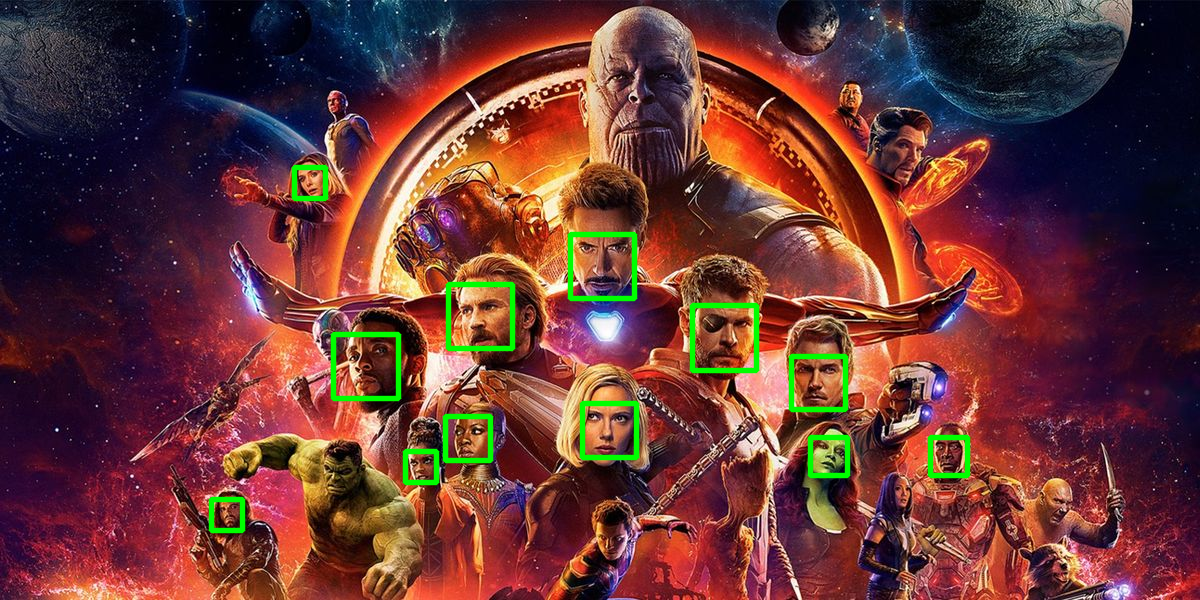

In [7]:
#宣告臉部偵測器，以及載入預訓練的臉部特徵點模型
detector = dlib.get_frontal_face_detector()

img = cv2.imread('/content/avengers1.jpg')
#產生臉部識別
face_rects = detector(img, 2)
for i, d in enumerate(face_rects):
    #讀取框左上右下座標
    x1 = d.left()
    y1 = d.top()
    x2 = d.right()
    y2 = d.bottom()
    #在臉部位置打框
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 4, cv2.LINE_AA)

#要顯示圖形前，需要將BGR轉RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
array2image(img)

In [8]:

data_provider=load_examples_data('beauty')
data_provider.image_transform_funcs=[
    random_adjust_gamma((0.9,1.1)),
    random_adjust_contrast((0.9,1.1)),
    random_blur((0.1,0.3)),
    resize((112,112),True),
    normalize(127.5,127.5)]#除了正規化之外

data,label=data_provider.next()
print(data_provider.signature)

beauty.tar: 33.0kMB [00:04, 7.00kMB/s]
Starting to decompress the archive....
5488 faces loaded...
data_provider( ) -> faces: Tensor[(-1, 3, 112, 112)], ratings: Tensor[(-1, 137)] 


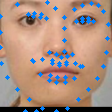

In [14]:
#copy()不能少
img=data[1].transpose([1,2,0]).copy()*127.5+127.5
landmark = (label[0][:-1].reshape(68,2)*img.shape[0]).round()
for (x, y) in landmark:
    img=cv2.circle(img, (int(x), int(y)), 2, (0, 128, 255), -1)

array2image(img)

[[ 55  39]
 [  4  46]
 [  6  60]
 [ 11  73]
 [ 21  82]
 [ 32  90]
 [ 45  95]
 [ 97  79]
 [106  69]
 [110  56]
 [111  42]
 [ 55  39]]


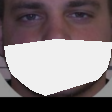

In [10]:
#copy()不能少
idxs=[30,2,3,4,5,6,7,11,12,13,14,15,16,30]
n=random.choice(range(data.shape[0]))
img=data[n].transpose([1,2,0]).copy()*127.5+127.5
landmark = (label[n][:-1].reshape(68,2)*img.shape[0]).round()


pts = [landmark[i]  for i in idxs if (i>6 and landmark[i][0]>0) or i<=6]
pts = np.int32(np.array(pts))
print(pts)
color = np.uint8((240,240,240)).tolist()
cv2.fillPoly(img, [pts], color)
array2image(img)
